In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import photRM # credits Dr Anđelka Kovačević & Isidora Jankov (https://github.com/LSST-sersag/dle)
from rm_utils import ZDCF, load_results_ZDCF, PLIKE # functions to wrap fortran programs
%load_ext autoreload

In [2]:
# hopefully this command returns a no input files error
! gfortran

# otherwise you'll need to run the command 
#   ---> brew install gcc

gfortran: fatal error: no input files
compilation terminated.


## Compile the fortran programs if they aren't already

In [3]:
FORTRAN_DIR = 'fortran_dir'
os.chdir(FORTRAN_DIR)
! gfortran zdcf_v2.2.f90 -o zdcf
! gfortran plike_v4.0.f90 -o plike
os.chdir('../')

In [212]:
%autoreload

In [213]:
fortran_dir='/Users/mattlowery/Desktop/code/astro/hetvae/src/reverberation_mapping/fortran_dir'
os.chdir('/Users/mattlowery/Desktop/code/astro/hetvae/src/reverberation_mapping')

- **<font color='violet'> $g$-band covers continuum </font>**
- **<font color='#0AD304'>$r$-band covers Hb and continuum </font>**
- **<font color='indianred'> $i$-band covers Ha and continuum </font>**

We choose **g band** for pure continuum light curve (X-band) and **r band** for continuum + line light curve (Y-band).

**Note:** i-band light curves usually have much lower number of points compared to g and r bands, which is the reason for not considering it in this analysis.

## Averaging duplicates in the light curves

In [214]:
# B,G,V,R,I,Z

B = '3C273_Bband_truncated_detrended_1st-order_new.dat'
G = '3C273_Gband_truncated_detrended_1st-order_new.dat'
V = '3C273_Vband_truncated_detrended_1st-order_new.dat'
R = '3C273_Rband_truncated_detrended_1st-order_new.dat'
I = '3C273_Iband_truncated_detrended_1st-order_new.dat'
Z = '3C273_Zband_truncated_detrended_1st-order_new.dat'

# new fns
B_ = B.split('band')[0]
G_ = G.split('band')[0]
V_ = V.split('band')[0]
R_ = R.split('band')[0]
I_ = I.split('band')[0]
Z_ = Z.split('band')[0]

os.chdir('/Users/mattlowery/Desktop/code/astro/hetvae/src/reverberation_mapping/fortran_dir/3C_273_data')

## averaging duplicates in the light curves and saving them again
B_df = pd.read_csv(B, sep=' ', header=None)
B_df = B_df.groupby(0).mean().reset_index()
B_df.to_csv(B_, sep=' ', header=False, index=False)
################
G_df = pd.read_csv(G, sep=' ', header=None)
G_df = G_df.groupby(0).mean().reset_index()
G_df.to_csv(G_, sep=' ', header=False, index=False)
#################
V_df = pd.read_csv(V, sep=' ', header=None)
V_df = V_df.groupby(0).mean().reset_index()
V_df.to_csv(V_, sep=' ', header=False, index=False)
#################
R_df = pd.read_csv(R, sep=' ', header=None)
R_df = R_df.groupby(0).mean().reset_index()
R_df.to_csv(R_, sep=' ', header=False, index=False)
#################
I_df = pd.read_csv(I, sep=' ', header=None)
I_df = I_df.groupby(0).mean().reset_index()
I_df.to_csv(I_, sep=' ', header=False, index=False)
#################
Z_df = pd.read_csv(Z, sep=' ', header=None)
Z_df = Z_df.groupby(0).mean().reset_index()
Z_df.to_csv(Z_, sep=' ', header=False, index=False)

In [215]:
## move new lcs into fortran_dir
! cp -r 3C273_? ../

## Quick plotting 

Text(0.5, 1.0, '3C273')

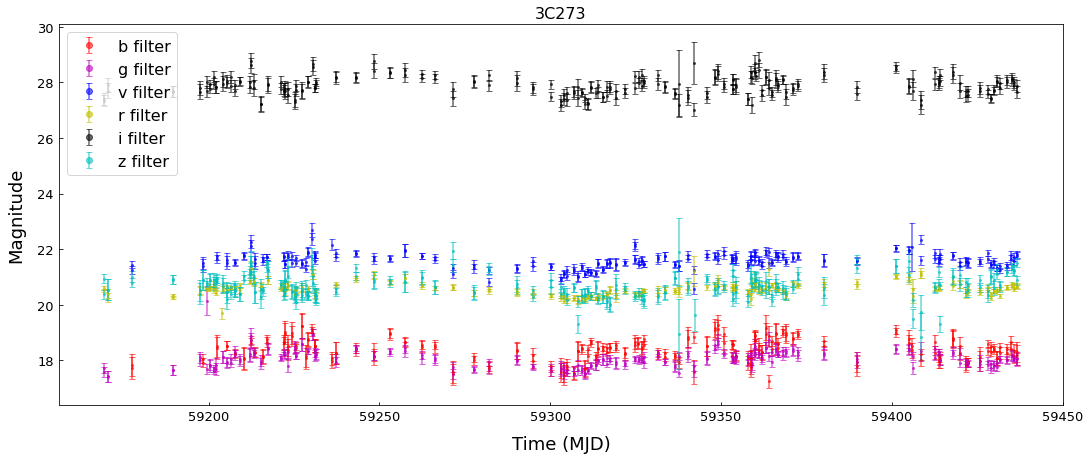

In [216]:
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot()
# g and v the same? 
ax.errorbar(B_df[0], B_df[1], yerr=B_df[2], fmt='ro', markersize=2,alpha=0.6,capsize=3, label='b filter')
ax.errorbar(G_df[0], G_df[1], yerr=G_df[2], fmt='mo', markersize=2,alpha=0.6,capsize=3, label='g filter')
ax.errorbar(V_df[0], V_df[1], yerr=V_df[2], fmt='bo', markersize=2,alpha=0.6,capsize=3, label='v filter')
ax.errorbar(R_df[0], R_df[1], yerr=R_df[2], fmt='yo', markersize=2,alpha=0.6,capsize=3, label='r filter')
ax.errorbar(I_df[0], I_df[1], yerr=I_df[2], fmt='ko', markersize=2,alpha=0.6,capsize=3, label='i filter')
ax.errorbar(Z_df[0], Z_df[1], yerr=Z_df[2], fmt='co', markersize=2,alpha=0.6,capsize=3, label='z filter')

ax.set_xlabel('Time (MJD)',fontsize = 18, labelpad=12)
ax.set_ylabel('Magnitude',fontsize = 18,labelpad=12)
ax.tick_params(direction='in', pad = 5, labelsize=13)
ax.legend(fontsize=16, markerscale=3)
ax.set_title('3C273', size=16)


In [ ]:
# autocorrelation function w/ continuum
ZDCF(B_, B_, 'ccf_bb_3c273', acf=True, fortran_dir=fortran_dir)
# ccf w/ continuum and other bands
ZDCF(B_,G_, 'ccf_bg_3c273', fortran_dir=fortran_dir)
ZDCF(B_,V_, 'ccf_bv_3c273', fortran_dir=fortran_dir)
ZDCF(B_,R_, 'ccf_br_3c273', fortran_dir=fortran_dir)
ZDCF(B_,I_, 'ccf_bi_3c273', fortran_dir=fortran_dir)
ZDCF(B_,Z_, 'ccf_bz_3c273', fortran_dir=fortran_dir)

## ZDCF saves results as ___.dcf

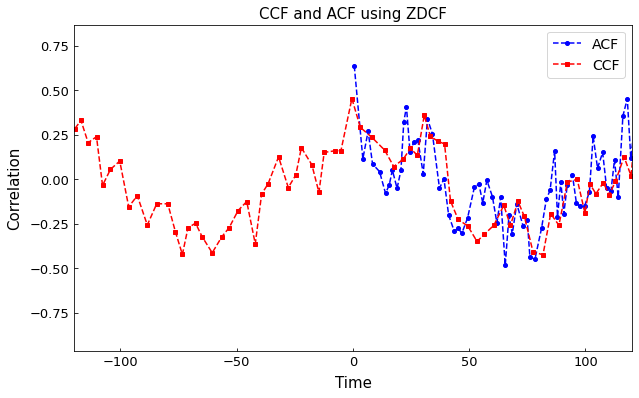

In [218]:
acf, ccf_bg = load_results_ZDCF('ccf_bb_3c273.dcf', 'ccf_bg_3c273.dcf', fortran_dir=fortran_dir, plot=True)
_, ccf_bv = load_results_ZDCF('ccf_bb_3c273.dcf', 'ccf_bv_3c273.dcf', fortran_dir=fortran_dir, plot=False)
_, ccf_br = load_results_ZDCF('ccf_bb_3c273.dcf', 'ccf_br_3c273.dcf', fortran_dir=fortran_dir, plot=False)
_, ccf_bi = load_results_ZDCF('ccf_bb_3c273.dcf', 'ccf_bi_3c273.dcf', fortran_dir=fortran_dir, plot=False)
_, ccf_bz = load_results_ZDCF('ccf_bb_3c273.dcf', 'ccf_bz_3c273.dcf', fortran_dir=fortran_dir, plot=False)

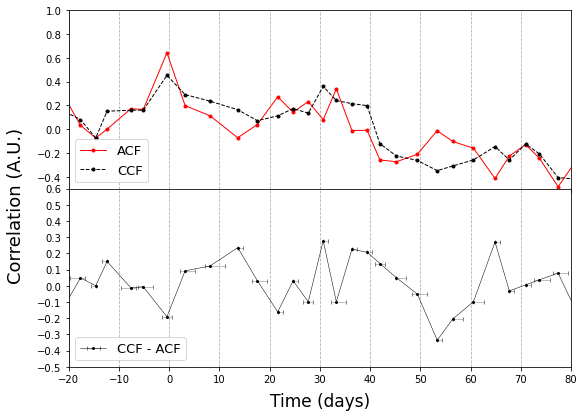

In [223]:
######## g
# since ZDCF does not provide the ACF on the negative tau axis, we need to add it:
acf_total = photRM.add_inverted_acf(acf)
# We still need to make CCF and ACF the same length so we could subtract them.
# We do this by interpolating one of those functions to the time grid of the other.
acf_interp_bg = photRM.interp(ccf_bg, acf_total) # first param is the function having the x-axis on which we want to interpolate the other function.
# Subtracting CCF and ACF
final_ccf_bg = photRM.delta_ccf(acf_interp, ccf_bg)
final_ccf_bg.to_csv(os.path.join(fortran_dir,'plike_bg_3c273.dcf'), sep=" ", index=False, header=False)
final_ccf_bg.tail()
photRM.plot_ccf_acf(final_ccf_bg, ccf_bg, acf_interp_bg, locator=10)

In [224]:
###### v
acf_interp_bv = photRM.interp(ccf_bv, acf_total)
final_ccf_bv = photRM.delta_ccf(acf_interp_bv, ccf_bv)
final_ccf_bv.to_csv(os.path.join(fortran_dir,'plike_bv_3c273.dcf'), sep=" ", index=False, header=False)
###### r
acf_interp_br = photRM.interp(ccf_br, acf_total)
final_ccf_br = photRM.delta_ccf(acf_interp_br, ccf_br)
final_ccf_br.to_csv(os.path.join(fortran_dir,'plike_br_3c273.dcf'), sep=" ", index=False, header=False)
###### i
acf_interp_bi = photRM.interp(ccf_bi, acf_total)
final_ccf_bi = photRM.delta_ccf(acf_interp_bi, ccf_bi)
final_ccf_bi.to_csv(os.path.join(fortran_dir,'plike_bi_3c273.dcf'), sep=" ", index=False, header=False)
###### z
acf_interp_bz = photRM.interp(ccf_bz, acf_total)
final_ccf_bz = photRM.delta_ccf(acf_interp_bz, ccf_bz)
final_ccf_bz.to_csv(os.path.join(fortran_dir,'plike_bz_3c273.dcf'), sep=" ", index=False, header=False)

## G band lag

In [225]:
PLIKE('plike_bg_3c273.dcf', 0,100)

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  0.000E+00 to  1.000E+02

  28 data points found in time-lag range

ZDCF peak at  +3.067E+01 r_max =  +2.782E-01 ZDCF C.O.M. at  +3.067E+01

Progress meter: ............................

Results:

# PLIKE V4.0 ZDCF peak likelihood analysis
# for file plike_bg_3c273.dcf
#
# num      lag         r         -dr        +dr    likelihood 
# ---- ---------- ---------- ---------- ---------- ---------- 
     1  3.177E+00  9.251E-02  1.102E-01  1.090E-01  2.127E-03
     2  8.130E+00  1.223E-01  1.152E-01  1.142E-01  6.477E-03
     3  1.365E+01  2.357E-01  1.369E-01  1.369E-01  1.101E-01
     4  1.755E+01  3.195E-02  1.395E-01  1.390E-01  1.618E-03
     5  2.161E+01 -1.609E-01  1.570E-01  1.536E-01  7.221E-05
     6  2.468E+01  3.109E-02  1.516E-01  1.497E-01  2.431E-03
     7  2.769E+01 -9.890E-02  1.465E-01  1.446E-01  3.139E-05
     8  3.067E+01  2.78

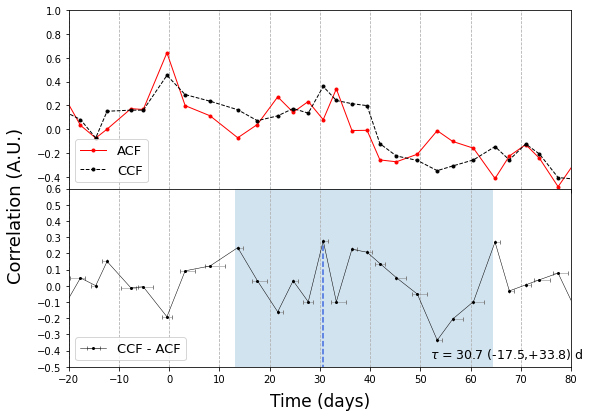

In [226]:
#+3.067E+01  +3.378E+01  -1.753E+01
tau = 30.67
err_low = -17.53
err_high = 33.78
photRM.plot_ccf_acf(final_ccf_bg, ccf_bg, acf_interp_bg, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

## V band lag

In [227]:
PLIKE('plike_bv_3c273.dcf', 0,100)

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  0.000E+00 to  1.000E+02

  28 data points found in time-lag range

ZDCF peak at  +6.489E+01 r_max =  +4.323E-01 ZDCF C.O.M. at  +6.489E+01

Progress meter: ...........................

Results:

# PLIKE V4.0 ZDCF peak likelihood analysis
# for file plike_bv_3c273.dcf
#
# num      lag         r         -dr        +dr    likelihood 
# ---- ---------- ---------- ---------- ---------- ---------- 
     1  1.842E-03 -1.789E-01  7.057E-02  6.867E-02  0.000E+00
     2  2.152E+00 -1.271E-01  8.069E-02  7.910E-02  8.337E-11
     3  8.072E+00  2.002E-01  1.132E-01  1.120E-01  4.768E-03
     4  1.343E+01  1.853E-01  1.368E-01  1.370E-01  7.426E-03
     5  1.752E+01  3.217E-02  1.392E-01  1.387E-01  1.208E-04
     6  2.169E+01 -2.250E-01  1.559E-01  1.526E-01  5.884E-07
     7  2.523E+01 -1.655E-01  1.546E-01  1.538E-01  2.392E-07
     8  2.816E+01 -9.464

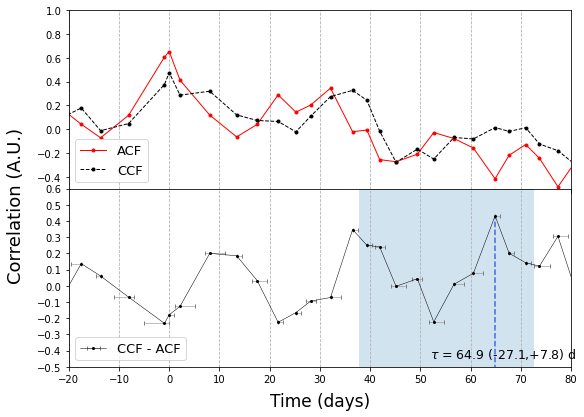

In [228]:
# +6.489E+01  +7.844E+00  -2.705E+01
tau = 64.89
err_low = -27.05
err_high = 7.844
photRM.plot_ccf_acf(final_ccf_bv, ccf_bv, acf_interp_bv, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

## R band lag

In [229]:
PLIKE('plike_br_3c273.dcf', 0,100)

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  0.000E+00 to  1.000E+02

  29 data points found in time-lag range

ZDCF peak at  +3.068E+01 r_max =  +3.890E-01 ZDCF C.O.M. at  +3.068E+01

Progress meter: .............................

Results:

# PLIKE V4.0 ZDCF peak likelihood analysis
# for file plike_br_3c273.dcf
#
# num      lag         r         -dr        +dr    likelihood 
# ---- ---------- ---------- ---------- ---------- ---------- 
     1  6.202E-03 -2.908E-01  7.733E-02  7.554E-02  2.582E-17
     2  2.164E+00 -1.193E-01  8.178E-02  8.013E-02  1.393E-10
     3  8.102E+00  5.634E-02  1.167E-01  1.159E-01  5.884E-05
     4  1.363E+01  2.639E-01  1.368E-01  1.367E-01  4.864E-02
     5  1.756E+01  1.300E-01  1.385E-01  1.376E-01  2.615E-03
     6  2.162E+01  1.580E-01  1.469E-01  1.422E-01  1.462E-02
     7  2.472E+01  2.122E-01  1.463E-01  1.436E-01  2.168E-02
     8  2.790E+01  1.1

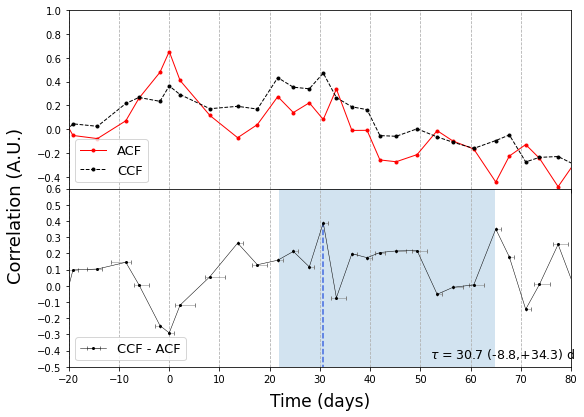

In [230]:
# PLIKE results:
# +3.068E+01  +3.427E+01  -8.826E+00
tau = 30.68
err_low = -8.826
err_high = 34.26
photRM.plot_ccf_acf(final_ccf_br, ccf_br, acf_interp_br, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

## I band lag

In [231]:
PLIKE('plike_bi_3c273.dcf', 0,100)

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  0.000E+00 to  1.000E+02

  28 data points found in time-lag range

ZDCF peak at  +6.491E+01 r_max =  +5.058E-01 ZDCF C.O.M. at  +6.586E+01

Progress meter: ............................

Results:

# PLIKE V4.0 ZDCF peak likelihood analysis
# for file plike_bi_3c273.dcf
#
# num      lag         r         -dr        +dr    likelihood 
# ---- ---------- ---------- ---------- ---------- ---------- 
     1  3.180E+00 -1.901E-01  1.144E-01  1.140E-01  3.811E-12
     2  8.128E+00  1.664E-03  1.171E-01  1.164E-01  7.959E-07
     3  1.366E+01  3.226E-01  1.349E-01  1.347E-01  4.408E-02
     4  1.756E+01  6.552E-02  1.390E-01  1.383E-01  8.327E-05
     5  2.162E+01 -3.015E-01  1.575E-01  1.547E-01  5.905E-09
     6  2.468E+01 -5.500E-02  1.531E-01  1.516E-01  3.334E-06
     7  2.770E+01 -6.046E-02  1.453E-01  1.431E-01  1.077E-06
     8  3.067E+01  3.44

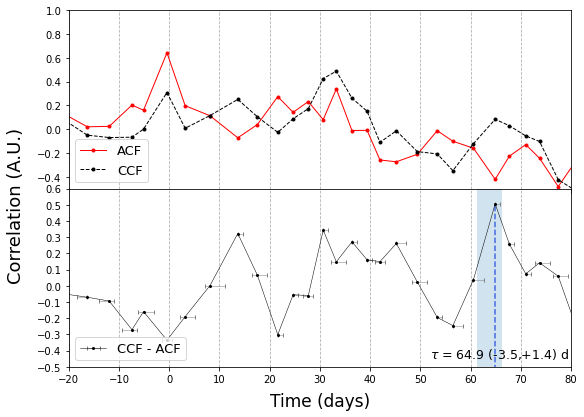

In [232]:
#+6.491E+01  +1.363E+00  -3.537E+00
tau = 64.91
err_low = -3.537
err_high = 1.363
photRM.plot_ccf_acf(final_ccf_bi, ccf_bi, acf_interp_bi, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

## Z band lag

In [233]:
PLIKE('plike_bz_3c273.dcf', 0,100)

PLIKE V4.0 begins.
Enter dcf file name:
Enter lower bound on peak location:
Enter upper bound on peak location:

Calculating ML in range t_lag =  0.000E+00 to  1.000E+02

  29 data points found in time-lag range

ZDCF peak at  +4.524E+01 r_max =  +5.265E-01 ZDCF C.O.M. at  +4.391E+01

Progress meter: ....................

Results:

# PLIKE V4.0 ZDCF peak likelihood analysis
# for file plike_bz_3c273.dcf
#
# num      lag         r         -dr        +dr    likelihood 
# ---- ---------- ---------- ---------- ---------- ---------- 
     1  7.766E-03 -6.522E-01  8.207E-02  8.149E-02  0.000E+00
     2  2.205E+00 -3.513E-01  8.623E-02  8.550E-02  0.000E+00
     3  8.074E+00 -1.962E-01  1.173E-01  1.172E-01  0.000E+00
     4  1.364E+01  1.844E-01  1.379E-01  1.380E-01  0.000E+00
     5  1.755E+01  2.151E-01  1.362E-01  1.351E-01  0.000E+00
     6  2.160E+01 -4.913E-02  1.549E-01  1.509E-01  0.000E+00
     7  2.468E+01  9.006E-02  1.504E-01  1.482E-01  0.000E+00
     8  2.769E+01 -7.686E-03  1

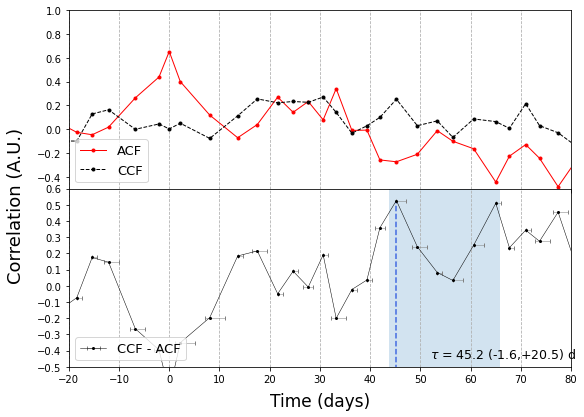

In [234]:
# PLIKE results:
# +4.524E+01  +2.054E+01  -1.570E+00
tau = 45.24
err_low = -1.57
err_high = 20.54
photRM.plot_ccf_acf(final_ccf_bz, ccf_bz, acf_interp_bz, locator=10, peak=True, tau=tau, err_low=err_low, err_high=err_high, x1=-20, x2=80)

# RESULTS


### G band lag = 30.67  +33.78   -17.53

### V band lag = 64.89  +7.844   -27.05

### R band lag = 30.68  +34.27   -8.826
### I band lag = 64.91  +1.363   -3.537
### Z band lag = 45.24  +20.54   -1.57



